# Aula 1 - Introduzindo o reconhecimento de áudio

## Vídeo 1.2 - Carregando os dados

In [7]:
gz_path = '/teamspace/studios/this_studio/dataset_commands.gz'

In [3]:
#!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 95.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 94.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 63.0 MB/s eta 0:00:00
  Att

In [8]:
import tensorflow as tf
import pathlib
import os
import gzip
import shutil
import numpy as np

In [9]:
def le_arquivos(gz_path):
    # Diretório onde os dados serão extraídos
    extracted_path = '/tmp/dataset_commands'
    # Extrair o arquivo .gz
    with gzip.open(gz_path, 'rb') as f_in:
        with open(extracted_path + '.tar', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # Extrair o arquivo .tar resultante
    shutil.unpack_archive(extracted_path + '.tar', extracted_path)

    # Caminho para os dados extraídos
    data_dir = pathlib.Path(extracted_path)

    # Listar todos os arquivos de áudio e suas labels
    all_audio_paths = list(data_dir.glob('*/**/*.wav'))
    all_labels = [path.parent.name for path in all_audio_paths]

    # Converter caminhos para strings
    all_audio_paths = [str(path) for path in all_audio_paths]

    return all_audio_paths, all_labels

In [10]:
all_audio_paths, all_labels = le_arquivos(gz_path)

In [11]:
np.unique(all_labels)

array(['_background_noise_', 'backward', 'bed', 'bird', 'cat', 'dog',
       'down', 'eight', 'five', 'follow', 'forward', 'four', 'go',
       'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off',
       'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three',
       'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero'], dtype='<U18')

In [12]:
np.unique(all_labels).shape

(36,)

In [13]:
import matplotlib.pyplot as plt

In [14]:
example_audio_path = all_audio_paths[0]

In [15]:
# Carregar o arquivo de áudio
audio_binary = tf.io.read_file(example_audio_path)
audio, _ = tf.audio.decode_wav(audio_binary)
audio = tf.squeeze(audio, axis=-1)

I0000 00:00:1723206607.635407    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723206607.866953    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723206607.867239    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723206607.870964    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

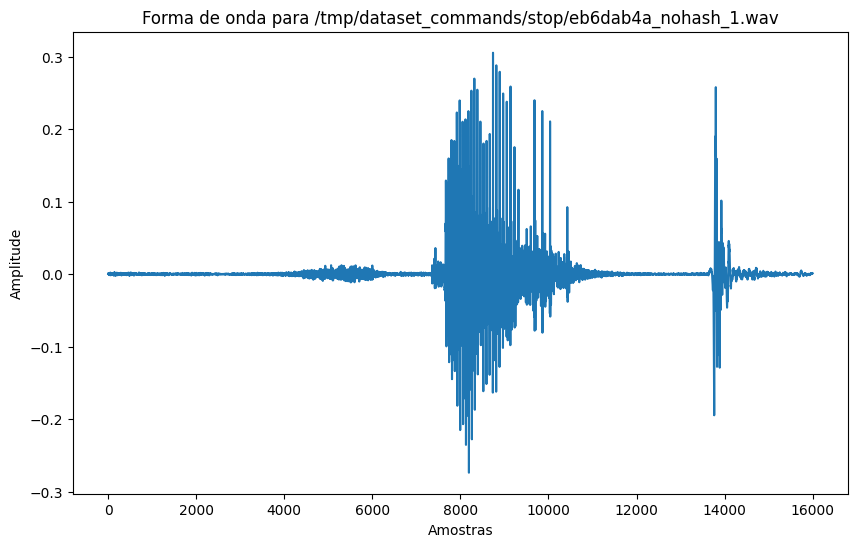

In [16]:
# Plotar a forma de onda
plt.figure(figsize=(10, 6))
plt.plot(audio.numpy())
plt.title(f'Forma de onda para {example_audio_path}')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

## Vídeo 1.3 - Processando os dados de áudio

In [17]:
from scipy.signal import resample


In [18]:
# Função para carregar e processar o áudio com resampling usando SciPy
def load_and_process_audio(filename, max_length=16000):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    
    # Função de resampling usando SciPy
    def scipy_resample(wav, sample_rate):
        if sample_rate != 16000:
            wav = resample(wav, int(16000 / sample_rate * len(wav)))
        return wav

    # Usar tf.py_function para envolver a operação de resampling
    wav = tf.py_function(scipy_resample, [wav, sample_rate], tf.float32)
    
    # Adicionar padding ou cortar os sinais de áudio
    audio_length = tf.shape(wav)[0]
    if audio_length > max_length:
        wav = wav[:max_length]
    else:
        pad_length = max_length - audio_length
        paddings = [[0, pad_length]]
        wav = tf.pad(wav, paddings, "CONSTANT")
    
    return tf.reshape(wav, [max_length])

In [19]:
# Função para processar o caminho do arquivo de áudio e sua label
def process_path(file_path, label):
    audio = load_and_process_audio(file_path)
    return audio, label

In [20]:
# Criar um dataset do TensorFlow
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    audio_label_ds = tf.data.Dataset.zip((path_ds, label_ds))
    return audio_label_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

In [21]:
# Função para preparar o dataset para o treinamento
def prepare_for_training(ds, batch_size=32, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

In [22]:
from sklearn.preprocessing import LabelEncoder
# Codificar as labels como inteiros
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

In [23]:
# Conjunto completo de dados
complete_dataset = paths_and_labels_to_dataset(all_audio_paths, all_labels_encoded)

## Vídeo 1.4 - Treinando a rede

In [24]:
# Dividir o dataset em treino e validação
total_size = len(all_audio_paths)
val_size = int(0.02 * total_size)
train_size = total_size - val_size

In [25]:
complete_dataset = complete_dataset.shuffle(buffer_size=total_size, seed=42)
train_dataset = complete_dataset.take(train_size)
val_dataset = complete_dataset.skip(train_size)

In [26]:
train_dataset = prepare_for_training(train_dataset)
val_dataset = prepare_for_training(val_dataset)

In [27]:
from tensorflow.keras import layers, models

In [28]:
# Treinamento no domínio do tempo
model_time_domain = models.Sequential([
    layers.Input(shape=(16000, 1)),
    layers.Conv1D(16, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(36, activation='softmax')
])

In [29]:
model_time_domain.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [30]:
history_time_domain = model_time_domain.fit(train_dataset, epochs=10, validation_data=val_dataset)


Epoch 1/10


2024-08-09 12:30:41.867137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 26817 of 105835
2024-08-09 12:31:01.859021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 80319 of 105835
2024-08-09 12:31:11.523469: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:31:11.524765: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
I0000 00:00:1723206671.527419    5067 service.cc:146] XLA service 0x7f9f44021a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723206671.527638    5067 service.cc:154]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
2024-08-09 12:31:11.571020: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CR

   9/3242 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.0342 - loss: 3.6397      

I0000 00:00:1723206674.295824    5067 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1309 - loss: 3.1575

2024-08-09 12:32:15.051822: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 26671 of 105835
2024-08-09 12:32:25.053239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 53428 of 105835
2024-08-09 12:32:44.939372: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:32:45.094053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:32:45.094914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 135s 28ms/step - accuracy: 0.1309 - loss: 3.1574 - val_accuracy: 0.2722 - val_loss: 2.5281
Epoch 2/10


2024-08-09 12:32:56.883577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27592 of 105835
2024-08-09 12:33:06.883709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54871 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.2825 - loss: 2.5406

2024-08-09 12:33:25.492113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:33:25.492162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:33:25.493466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2875 - loss: 2.4856

2024-08-09 12:34:24.296185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27422 of 105835
2024-08-09 12:34:44.303020: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82299 of 105835
2024-08-09 12:34:53.047889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:34:53.196238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.2875 - loss: 2.4856 - val_accuracy: 0.3587 - val_loss: 2.2315
Epoch 3/10


2024-08-09 12:35:03.472468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27508 of 105835
2024-08-09 12:35:13.476757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54844 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.3689 - loss: 2.2188

2024-08-09 12:35:32.071811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:35:32.071863: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:35:32.073160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3578 - loss: 2.2032

2024-08-09 12:36:30.871548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27259 of 105835
2024-08-09 12:36:50.876128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82159 of 105835
2024-08-09 12:36:59.629133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:36:59.783021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.3578 - loss: 2.2032 - val_accuracy: 0.4164 - val_loss: 1.9797
Epoch 4/10


2024-08-09 12:37:10.147005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27634 of 105835
2024-08-09 12:37:30.145924: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82216 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.3699 - loss: 2.1695

2024-08-09 12:37:38.728213: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:37:38.729568: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4145 - loss: 1.9920

2024-08-09 12:38:37.563726: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27312 of 105835
2024-08-09 12:38:57.558756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82317 of 105835
2024-08-09 12:39:06.239229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:39:06.391977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.4145 - loss: 1.9920 - val_accuracy: 0.4939 - val_loss: 1.7440
Epoch 5/10


2024-08-09 12:39:16.788396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27634 of 105835
2024-08-09 12:39:36.786736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82713 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.5047 - loss: 1.6456

2024-08-09 12:39:45.270127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:39:45.271564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4733 - loss: 1.7731

2024-08-09 12:40:44.056022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27347 of 105835
2024-08-09 12:40:54.056193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55035 of 105835
2024-08-09 12:41:12.748753: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:41:12.902513: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:41:12.903378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.4733 - loss: 1.7731 - val_accuracy: 0.5369 - val_loss: 1.5849
Epoch 6/10


2024-08-09 12:41:23.271542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27715 of 105835
2024-08-09 12:41:43.271403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82834 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.5767 - loss: 1.6019

2024-08-09 12:41:51.728007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:41:51.729299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5299 - loss: 1.5822

2024-08-09 12:42:50.522207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27491 of 105835
2024-08-09 12:43:10.523062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82725 of 105835
2024-08-09 12:43:18.876609: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:43:19.023183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 126s 27ms/step - accuracy: 0.5299 - loss: 1.5822 - val_accuracy: 0.5841 - val_loss: 1.4097
Epoch 7/10


2024-08-09 12:43:29.331930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27215 of 105835
2024-08-09 12:43:39.334740: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54579 of 105835
2024-08-09 12:43:49.335358: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82169 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.5949 - loss: 1.3597

2024-08-09 12:43:58.036386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:43:58.038108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5774 - loss: 1.4171

2024-08-09 12:44:56.780252: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27298 of 105835
2024-08-09 12:45:06.780983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54936 of 105835
2024-08-09 12:45:16.789940: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82171 of 105835
2024-08-09 12:45:25.414278: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:45:25.568587: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.5774 - loss: 1.4171 - val_accuracy: 0.6342 - val_loss: 1.2836
Epoch 8/10


2024-08-09 12:45:35.872185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27395 of 105835
2024-08-09 12:45:55.871785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82625 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.6171 - loss: 1.3331

2024-08-09 12:46:04.360892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:46:04.362151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6232 - loss: 1.2682

2024-08-09 12:47:03.173988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27664 of 105835
2024-08-09 12:47:13.180641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55013 of 105835
2024-08-09 12:47:31.724280: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:47:31.876438: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:47:31.877285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 126s 27ms/step - accuracy: 0.6232 - loss: 1.2682 - val_accuracy: 0.6867 - val_loss: 1.0732
Epoch 9/10


2024-08-09 12:47:42.184348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27298 of 105835
2024-08-09 12:47:52.185154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54615 of 105835
2024-08-09 12:48:02.185454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82297 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.6273 - loss: 1.2277

2024-08-09 12:48:10.839170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:48:10.840456: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6619 - loss: 1.1405

2024-08-09 12:49:09.872056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27696 of 105835
2024-08-09 12:49:29.754799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82280 of 105835
2024-08-09 12:49:38.312561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:49:38.470091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.6619 - loss: 1.1405 - val_accuracy: 0.7098 - val_loss: 1.0062
Epoch 10/10


2024-08-09 12:49:48.812908: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27232 of 105835
2024-08-09 12:49:58.814776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54564 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.7083 - loss: 1.0484

2024-08-09 12:50:17.485418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:50:17.485466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:50:17.486773: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6960 - loss: 1.0307

2024-08-09 12:51:16.311610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27734 of 105835
2024-08-09 12:51:36.308984: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82364 of 105835
2024-08-09 12:51:44.842957: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:51:44.996898: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.6960 - loss: 1.0308 - val_accuracy: 0.7264 - val_loss: 0.9427


In [31]:
def plot_history(history):
    # Resumo do histórico de precisão
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend(loc='lower right')

    # Resumo do histórico de perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], label='Perda de Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


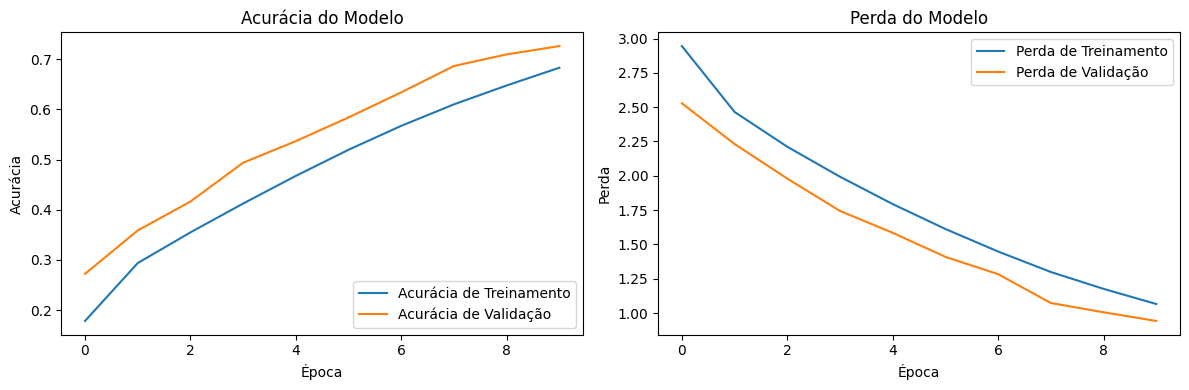

In [32]:
plot_history(history_time_domain)

# Aula 2 - Mudando o domínio

## Vídeo 2.1 - Aplicando a FFT

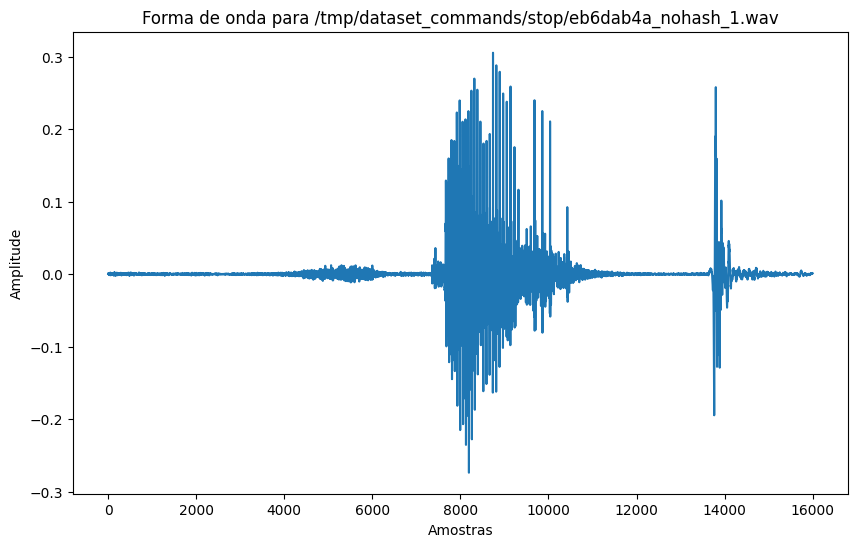

In [33]:
# Plotar a forma de onda
plt.figure(figsize=(10, 6))
plt.plot(audio.numpy())
plt.title(f'Forma de onda para {example_audio_path}')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

In [34]:
def espectrograma(formadeonda):
    # Converte a forma de onda para um espectro grama usando STFT.
    espect = tf.signal.stft(
      formadeonda, frame_length=255, frame_step=128)

    espect = tf.abs(espect)

    # Adiciona uma dimensão `channels`, 
    # para que o espectrograma possa ser usado 
    # como dados de entrada semelhantes a imagens 
    # com camadas de convolução 
    # (que esperam # formato (`batch_size`, `height`, `width`, `channels`).
    espect = espect[..., tf.newaxis]
    return espect


    

In [35]:
espect = espectrograma(audio.numpy())

In [36]:
def plota_espectrograma(espectrograma):
    if len(espectrograma.shape) > 2:
        assert len(espectrograma.shape) == 3
        espectrograma = np.squeeze(espectrograma, axis=-1)
    # Convert the frequencies to log scale and transpose, so that the time is
    # represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(espectrograma.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
    Y = range(height)
    plt.pcolormesh(X, Y, log_spec)

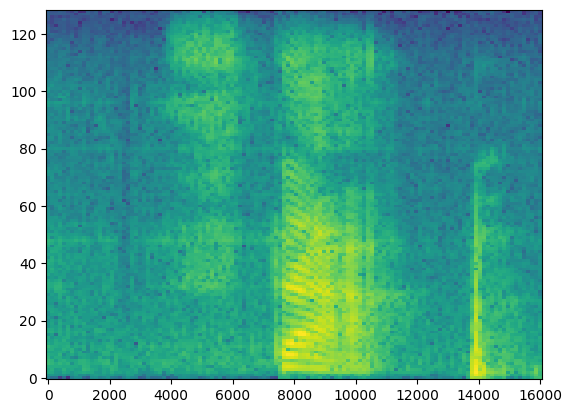

In [37]:
plota_espectrograma(espect)

## Vídeo 2.2 - Reprocessando os dados

In [38]:
def get_spectrogram_and_label_id(audio, label):
    espect = espectrograma(audio)
    return espect, label

In [39]:
train_spec = train_dataset.map(map_func=get_spectrogram_and_label_id,num_parallel_calls=tf.data.AUTOTUNE)
val_spec = val_dataset.map(map_func=get_spectrogram_and_label_id,num_parallel_calls=tf.data.AUTOTUNE)

In [40]:
# Normalize the spectrograms.
norm_layer = tf.keras.layers.Normalization()
# Get a batch of spectrograms to adapt the norm layer
for spectrogram, _ in train_spec.take(1):
    norm_layer.adapt(spectrogram)

2024-08-09 12:53:14.394983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27596 of 105835
2024-08-09 12:53:34.336132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82922 of 105835
2024-08-09 12:53:42.572183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:53:42.573441: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:53:42.691711: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [41]:
# Number of labels
num_labels = len(np.unique(all_labels))

In [42]:
# Get the input shape from the spectrograms
for spectrogram, _ in train_spec.take(1):
    input_shape = spectrogram.shape[1:]

2024-08-09 12:53:52.821520: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27352 of 105835
2024-08-09 12:54:02.822564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54825 of 105835
2024-08-09 12:54:21.293721: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:54:21.293776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:54:21.295031: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:54:21.378273: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Vídeo 2.3 - Adaptando a rede

In [43]:
input_shape

TensorShape([124, 129, 1])

In [44]:
train_spec = train_dataset.map(map_func=get_spectrogram_and_label_id, num_parallel_calls=tf.data.AUTOTUNE)
val_spec = val_dataset.map(map_func=get_spectrogram_and_label_id, num_parallel_calls=tf.data.AUTOTUNE)

In [45]:
model_spectrogram = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Resizing(32, 32),
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels, activation='softmax')
])

In [46]:
model_spectrogram.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [47]:
history_spectrogram = model_spectrogram.fit(train_spec, epochs=10, validation_data=val_spec)

Epoch 1/10


2024-08-09 12:54:40.629303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27419 of 105835
2024-08-09 12:54:50.636537: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55193 of 105835
2024-08-09 12:55:09.015274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:55:09.015325: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:55:09.016557: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3550 - loss: 2.3111

2024-08-09 12:55:31.320994: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27404 of 105835
2024-08-09 12:55:41.323262: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54704 of 105835
2024-08-09 12:56:00.027256: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:56:00.186984: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:56:00.187852: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 93s 16ms/step - accuracy: 0.3550 - loss: 2.3109 - val_accuracy: 0.7651 - val_loss: 0.8400
Epoch 2/10


2024-08-09 12:56:12.489002: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27614 of 105835
2024-08-09 12:56:32.489427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82213 of 105835


  67/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6326 - loss: 1.1927  

2024-08-09 12:56:41.052343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:56:41.053652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3236/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - loss: 1.1421

2024-08-09 12:56:58.422067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27320 of 105835
2024-08-09 12:57:08.422194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55030 of 105835
2024-08-09 12:57:26.903322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:57:27.056115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:57:27.056980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.6612 - loss: 1.1420 - val_accuracy: 0.8431 - val_loss: 0.5715
Epoch 3/10


2024-08-09 12:57:37.376575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27278 of 105835
2024-08-09 12:57:57.377408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82368 of 105835


  67/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7015 - loss: 0.9814  

2024-08-09 12:58:05.994637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:58:05.995989: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3217/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7176 - loss: 0.9463

2024-08-09 12:58:23.284900: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27747 of 105835
2024-08-09 12:58:43.283361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82404 of 105835
2024-08-09 12:58:51.774067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:58:51.928050: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.7176 - loss: 0.9462 - val_accuracy: 0.8611 - val_loss: 0.4917
Epoch 4/10


2024-08-09 12:59:02.203819: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27351 of 105835
2024-08-09 12:59:12.208793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55201 of 105835


  69/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7492 - loss: 0.8302  

2024-08-09 12:59:30.559359: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:59:30.559413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:59:30.560656: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3225/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.8327

2024-08-09 12:59:47.850846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27269 of 105835
2024-08-09 13:00:07.844727: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82311 of 105835
2024-08-09 13:00:16.496793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:00:16.649715: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.7492 - loss: 0.8326 - val_accuracy: 0.8724 - val_loss: 0.4112
Epoch 5/10


2024-08-09 13:00:26.941697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27655 of 105835
2024-08-09 13:00:46.936204: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82213 of 105835


  67/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7993 - loss: 0.7219  

2024-08-09 13:00:55.474375: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:00:55.475685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3226/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.7578

2024-08-09 13:01:12.767876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27242 of 105835
2024-08-09 13:01:22.768206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54563 of 105835
2024-08-09 13:01:32.771828: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82248 of 105835
2024-08-09 13:01:41.429102: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:01:41.582722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.7706 - loss: 0.7578 - val_accuracy: 0.8951 - val_loss: 0.3844
Epoch 6/10


2024-08-09 13:01:51.841387: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27703 of 105835
2024-08-09 13:02:11.836695: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82244 of 105835


  67/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7802 - loss: 0.7282  

2024-08-09 13:02:20.352258: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:02:20.353550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3228/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.7094

2024-08-09 13:02:37.775142: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27254 of 105835
2024-08-09 13:02:47.778665: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54947 of 105835
2024-08-09 13:03:06.291941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:03:06.442974: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:03:06.443820: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.7862 - loss: 0.7094 - val_accuracy: 0.8998 - val_loss: 0.3749
Epoch 7/10


2024-08-09 13:03:16.800894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27287 of 105835
2024-08-09 13:03:26.804209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54581 of 105835


  69/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8079 - loss: 0.6413  

2024-08-09 13:03:45.456027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:03:45.456073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:03:45.457350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3219/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.6595

2024-08-09 13:04:02.751130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27338 of 105835
2024-08-09 13:04:12.755061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55014 of 105835
2024-08-09 13:04:31.327525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:04:31.478615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:04:31.479462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.7981 - loss: 0.6595 - val_accuracy: 0.9050 - val_loss: 0.3308
Epoch 8/10


2024-08-09 13:04:41.796505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27231 of 105835
2024-08-09 13:04:51.796729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54537 of 105835


  67/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8071 - loss: 0.6229  

2024-08-09 13:05:10.473007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:05:10.473061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:05:10.474333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3239/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.6327

2024-08-09 13:05:27.841156: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27678 of 105835
2024-08-09 13:05:47.838341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82730 of 105835
2024-08-09 13:05:56.315070: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:05:56.468536: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.8070 - loss: 0.6327 - val_accuracy: 0.9301 - val_loss: 0.2734
Epoch 9/10


2024-08-09 13:06:06.802255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27294 of 105835
2024-08-09 13:06:26.801886: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82381 of 105835


  67/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8092 - loss: 0.5919  

2024-08-09 13:06:35.289479: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:06:35.290812: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3223/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.6008

2024-08-09 13:06:52.576362: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27261 of 105835
2024-08-09 13:07:12.576231: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82338 of 105835
2024-08-09 13:07:21.222515: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:07:21.376627: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.8158 - loss: 0.6008 - val_accuracy: 0.9164 - val_loss: 0.2830
Epoch 10/10


2024-08-09 13:07:31.682158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27699 of 105835
2024-08-09 13:07:51.677885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82350 of 105835


  69/3242 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8090 - loss: 0.6216  

2024-08-09 13:08:00.174843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:08:00.176161: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3225/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.5796

2024-08-09 13:08:17.483679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27283 of 105835
2024-08-09 13:08:27.488474: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54932 of 105835
2024-08-09 13:08:46.177772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:08:46.330907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:08:46.331754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 85s 14ms/step - accuracy: 0.8220 - loss: 0.5797 - val_accuracy: 0.9348 - val_loss: 0.2496


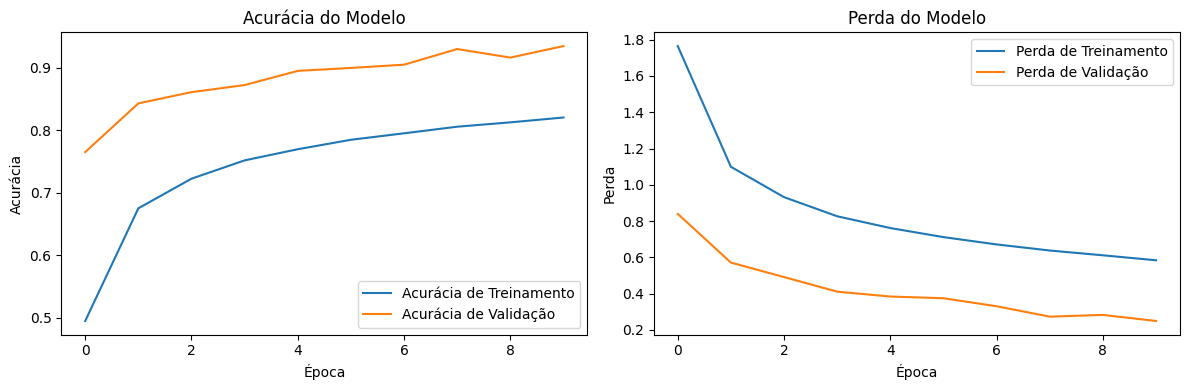

In [48]:

plot_history(history_spectrogram)


# Aula 3 - Mecanismos de atenção

## Vídeo 3.1 - Implementando uma camada de atenção de canal

Funcionamento da Camada de Atenção de Canal
A camada de atenção de canal funciona da seguinte maneira:

Pooling Global: São realizadas operações de GlobalAveragePooling2D e GlobalMaxPooling2D para obter a média e o máximo globais de cada canal, resultando em dois vetores de características representando a importância média e máxima de cada canal.

Camadas Densas: Os vetores de características são passados por duas camadas densas. A primeira camada reduz a dimensionalidade (controlada pelo parâmetro ratio), enquanto a segunda camada retorna a atenção (pesos) para cada canal.

Combinação e Aplicação de Atenção: Os vetores de atenção resultantes das operações de pooling global são combinados e aplicados aos canais de entrada originais. Isso ajusta os valores dos canais com base em sua importância calculada.

In [49]:
@tf.keras.utils.register_keras_serializable()
class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, ratio=8, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.ratio = ratio
        self.avg_pool = layers.GlobalAveragePooling2D()
        self.max_pool = layers.GlobalMaxPooling2D()

    def build(self, input_shape):
        self.fc1 = layers.Dense(units=input_shape[-1] // self.ratio, activation='relu')
        self.fc2 = layers.Dense(units=input_shape[-1], activation='sigmoid')

    def call(self, inputs):
        avg_out = self.avg_pool(inputs)
        max_out = self.max_pool(inputs)
        avg_out = self.fc2(self.fc1(avg_out))
        max_out = self.fc2(self.fc1(max_out))
        out = avg_out + max_out
        out = tf.expand_dims(tf.expand_dims(out, axis=1), axis=1)
        return inputs * out


## Vídeo 3.2 - Avaliação do modelo com atenção

In [50]:
model_spectrogram = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Resizing(32, 32),
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    ChannelAttention(ratio=8),
    layers.Conv2D(64, 3, activation='relu'),
    ChannelAttention(ratio=8),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels, activation='softmax')
])

In [51]:
model_spectrogram.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
history_spectrogram = model_spectrogram.fit(train_spec, epochs=10, validation_data=val_spec)

Epoch 1/10


2024-08-09 13:09:42.594988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27197 of 105835
2024-08-09 13:10:02.591870: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82093 of 105835
2024-08-09 13:10:11.207893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:10:11.209191: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3521 - loss: 2.3015

2024-08-09 13:10:37.581818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27110 of 105835
2024-08-09 13:10:57.581759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 81945 of 105835
2024-08-09 13:11:06.409861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:11:06.567356: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 97s 16ms/step - accuracy: 0.3521 - loss: 2.3013 - val_accuracy: 0.7741 - val_loss: 0.8152
Epoch 2/10


2024-08-09 13:11:18.408908: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27586 of 105835
2024-08-09 13:11:28.414830: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54798 of 105835


  60/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6341 - loss: 1.1773  

2024-08-09 13:11:47.049497: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:11:47.049549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:11:47.050830: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3238/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 1.1486

2024-08-09 13:12:05.787344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27632 of 105835
2024-08-09 13:12:15.793348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54853 of 105835
2024-08-09 13:12:34.401030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:12:34.559645: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:12:34.560507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.6561 - loss: 1.1485 - val_accuracy: 0.8275 - val_loss: 0.6198
Epoch 3/10


2024-08-09 13:12:44.875889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27182 of 105835
2024-08-09 13:13:04.871697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82004 of 105835


  57/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7417 - loss: 0.8751  

2024-08-09 13:13:13.521611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:13:13.522944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3220/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.9450

2024-08-09 13:13:32.135210: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27221 of 105835
2024-08-09 13:13:42.140296: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54862 of 105835
2024-08-09 13:14:00.775280: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:14:00.927846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:14:00.928692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.7170 - loss: 0.9449 - val_accuracy: 0.8544 - val_loss: 0.5128
Epoch 4/10


2024-08-09 13:14:11.249201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27165 of 105835
2024-08-09 13:14:21.335925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54711 of 105835


  59/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7274 - loss: 0.8412  

2024-08-09 13:14:39.952594: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:14:39.952646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:14:39.953880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3235/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.8379

2024-08-09 13:14:58.616552: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27685 of 105835
2024-08-09 13:15:08.621379: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54926 of 105835
2024-08-09 13:15:27.195387: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:15:27.350408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:15:27.351293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.7449 - loss: 0.8379 - val_accuracy: 0.8672 - val_loss: 0.4584
Epoch 5/10


2024-08-09 13:15:37.685875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27710 of 105835
2024-08-09 13:15:57.820409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82587 of 105835


  59/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7543 - loss: 0.7998  

2024-08-09 13:16:06.234004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:16:06.235322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3231/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7711 - loss: 0.7553

2024-08-09 13:16:24.930686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27217 of 105835
2024-08-09 13:16:44.926764: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82099 of 105835
2024-08-09 13:16:53.511390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:16:53.664937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.7711 - loss: 0.7553 - val_accuracy: 0.8800 - val_loss: 0.3994
Epoch 6/10


2024-08-09 13:17:03.980225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27171 of 105835
2024-08-09 13:17:23.977592: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 81981 of 105835


  57/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7916 - loss: 0.6524  

2024-08-09 13:17:32.633332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:17:32.634666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3219/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7826 - loss: 0.7042

2024-08-09 13:17:51.454840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27155 of 105835
2024-08-09 13:18:01.457989: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54371 of 105835
2024-08-09 13:18:20.264922: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:18:20.420771: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:18:20.421642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 87s 15ms/step - accuracy: 0.7826 - loss: 0.7042 - val_accuracy: 0.9036 - val_loss: 0.3279
Epoch 7/10


2024-08-09 13:18:30.769692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27718 of 105835
2024-08-09 13:18:50.768937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82800 of 105835


  58/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7849 - loss: 0.6734  

2024-08-09 13:18:59.222537: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:18:59.223831: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3221/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.6638

2024-08-09 13:19:17.999076: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27272 of 105835
2024-08-09 13:19:37.996216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82076 of 105835
2024-08-09 13:19:46.626959: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:19:46.782361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.7950 - loss: 0.6638 - val_accuracy: 0.9159 - val_loss: 0.2803
Epoch 8/10


2024-08-09 13:19:57.086320: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27102 of 105835
2024-08-09 13:20:17.082184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 81946 of 105835


  60/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8141 - loss: 0.5729  

2024-08-09 13:20:25.720971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:20:25.722278: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3224/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8069 - loss: 0.6197

2024-08-09 13:20:44.350296: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27164 of 105835
2024-08-09 13:20:54.353838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54813 of 105835
2024-08-09 13:21:13.130857: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:21:13.285513: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 13:21:13.286383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.8069 - loss: 0.6197 - val_accuracy: 0.9121 - val_loss: 0.2994
Epoch 9/10


2024-08-09 13:21:23.542998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27620 of 105835
2024-08-09 13:21:43.540813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82507 of 105835


  56/3242 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7882 - loss: 0.6387  

2024-08-09 13:21:52.141249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:21:52.142591: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3228/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.5976

2024-08-09 13:22:10.883484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27633 of 105835
2024-08-09 13:22:30.880556: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82489 of 105835
2024-08-09 13:22:39.502860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:22:39.658098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.8135 - loss: 0.5976 - val_accuracy: 0.9291 - val_loss: 0.2542
Epoch 10/10


2024-08-09 13:22:49.959551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27121 of 105835
2024-08-09 13:23:09.959747: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 81960 of 105835


  54/3242 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8167 - loss: 0.5742  

2024-08-09 13:23:18.622905: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:23:18.624206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3222/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8217 - loss: 0.5729

2024-08-09 13:23:37.342988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27196 of 105835
2024-08-09 13:23:57.340079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82108 of 105835
2024-08-09 13:24:06.087873: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 13:24:06.247037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 87s 15ms/step - accuracy: 0.8217 - loss: 0.5730 - val_accuracy: 0.9192 - val_loss: 0.2909


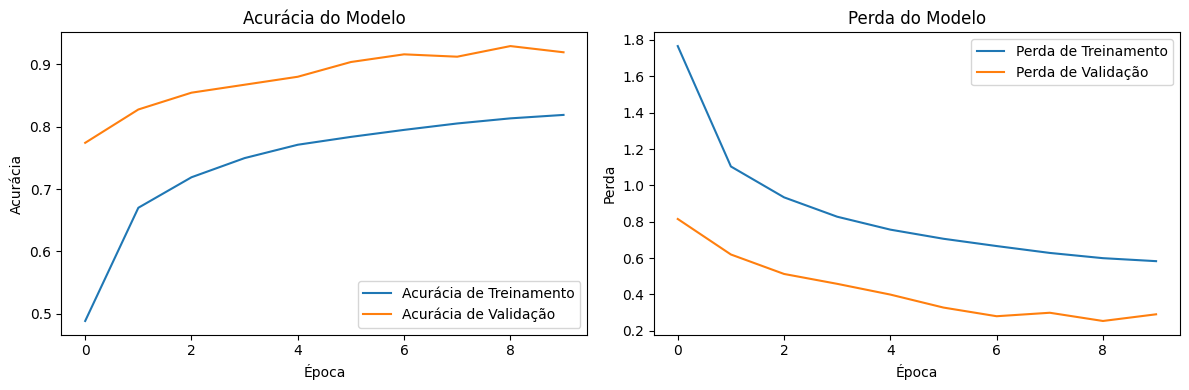

In [53]:
plot_history(history_spectrogram)

## Vídeo 3.3 - Salvando e fazendo uma inferência

In [65]:
# Caminho do arquivo específico que você quer classificar
specific_audio_path = '/teamspace/studios/this_studio/yes.wav'

In [66]:
# Carregar e processar o áudio
specific_audio = load_and_process_audio(specific_audio_path)
specific_spectrogram = espectrograma(specific_audio.numpy())

In [67]:
# Expandir a dimensão do batch para compatibilidade com o modelo
specific_spectrogram_batch = np.expand_dims(specific_spectrogram, axis=0)

In [68]:
# Fazer a predição
specific_predictions = model_spectrogram.predict(specific_spectrogram_batch)
specific_predicted_label = np.argmax(specific_predictions, axis=-1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [69]:
# Obter o nome da classe correspondente
predicted_class_name = label_encoder.inverse_transform([specific_predicted_label])[0]
predicted_class_name

'yes'

In [59]:
model_spectrogram.save("model_spectrogram.keras")

# Aula 4 - Trabalhando com modelos pré-treinados

## Vídeo 4.1 - Conhecendo o Yamnet

https://www.kaggle.com/models/google/yamnet

In [71]:
#!pip install tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [52]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import io
import os

In [53]:
# Load the model.
model = hub.load('https://www.kaggle.com/models/google/yamnet/TensorFlow2/yamnet/1')

In [54]:
# Input: 3 seconds of silence as mono 16 kHz waveform samples.
waveform = np.zeros(3 * 16000, dtype=np.float32)

In [55]:
scores, embeddings, log_mel_spectrogram = model(waveform)

In [56]:
scores

<tf.Tensor: shape=(6, 521), dtype=float32, numpy=
array([[8.2153974e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.2153974e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.2153974e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.2153974e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.2153974e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.2153974e-08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [57]:
def class_names_from_csv(class_map_csv_text):
    """Retorna uma lista de nomes de classes correspondentes ao vetor de pontuação."""
    class_map_df = pd.read_csv(io.StringIO(class_map_csv_text))
    class_names = class_map_df['display_name'].tolist()
    return class_names  

In [58]:
class_map_path = model.class_map_path().numpy()

In [59]:
class_names = class_names_from_csv(tf.io.read_file(class_map_path).numpy().decode('utf-8'))
class_names


['Speech',
 'Child speech, kid speaking',
 'Conversation',
 'Narration, monologue',
 'Babbling',
 'Speech synthesizer',
 'Shout',
 'Bellow',
 'Whoop',
 'Yell',
 'Children shouting',
 'Screaming',
 'Whispering',
 'Laughter',
 'Baby laughter',
 'Giggle',
 'Snicker',
 'Belly laugh',
 'Chuckle, chortle',
 'Crying, sobbing',
 'Baby cry, infant cry',
 'Whimper',
 'Wail, moan',
 'Sigh',
 'Singing',
 'Choir',
 'Yodeling',
 'Chant',
 'Mantra',
 'Child singing',
 'Synthetic singing',
 'Rapping',
 'Humming',
 'Groan',
 'Grunt',
 'Whistling',
 'Breathing',
 'Wheeze',
 'Snoring',
 'Gasp',
 'Pant',
 'Snort',
 'Cough',
 'Throat clearing',
 'Sneeze',
 'Sniff',
 'Run',
 'Shuffle',
 'Walk, footsteps',
 'Chewing, mastication',
 'Biting',
 'Gargling',
 'Stomach rumble',
 'Burping, eructation',
 'Hiccup',
 'Fart',
 'Hands',
 'Finger snapping',
 'Clapping',
 'Heart sounds, heartbeat',
 'Heart murmur',
 'Cheering',
 'Applause',
 'Chatter',
 'Crowd',
 'Hubbub, speech noise, speech babble',
 'Children playing'

In [60]:
class_names[np.argmax(scores.numpy().mean(axis=0))]

'Silence'

## Vídeo 4.2 - Aplicando em diferentes tipos de áudio

In [61]:
#!pip install librosa

In [62]:
import librosa

In [63]:
def load_audio(file_path):
    """
    Carrega um arquivo de áudio MP3 e retorna o waveform e a taxa de amostragem.

    Args:
    file_path (str): Caminho para o arquivo de áudio MP3.

    Returns:
    tuple: waveform (np.ndarray), sample_rate (int)
    """
    waveform, sample_rate = librosa.load(file_path, sr=None)
    return waveform, sample_rate

In [64]:
# Caminho para o arquivo barking.mp3
file_path = '/teamspace/studios/this_studio/dog-barking-70772.mp3'

In [65]:
# Carrega o arquivo de áudio
waveform, sample_rate = load_audio(file_path)

In [66]:
import matplotlib.pyplot as plt

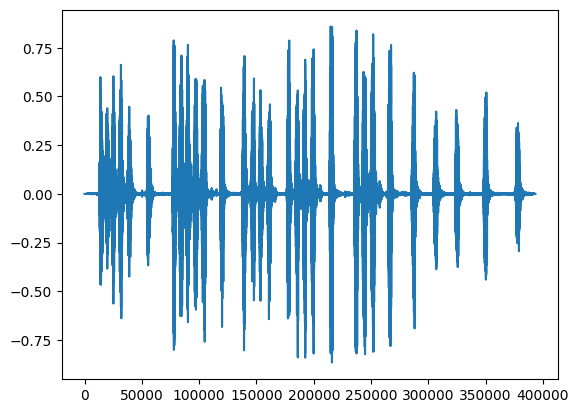

In [67]:
plt.plot(waveform)

In [68]:
scores, embeddings, log_mel_spectrogram = model(waveform)

In [69]:
class_names[np.argmax(scores.numpy().mean(axis=0))]

'Animal'

In [70]:
scores

<tf.Tensor: shape=(51, 521), dtype=float32, numpy=
array([[6.9663050e-03, 2.2335460e-04, 9.7923694e-05, ..., 2.4216286e-05,
        9.1223710e-06, 1.2670462e-08],
       [2.1255390e-04, 4.3409645e-07, 1.8451232e-07, ..., 6.4708710e-09,
        4.0296374e-08, 1.0892806e-12],
       [8.0767544e-03, 7.6120334e-05, 1.8801491e-05, ..., 1.8574796e-05,
        2.1754194e-04, 6.5904731e-09],
       ...,
       [6.7678449e-04, 4.0605796e-06, 1.9492431e-06, ..., 1.0290094e-06,
        3.2662399e-07, 1.7064310e-09],
       [4.5288508e-03, 4.6727215e-05, 3.1295334e-05, ..., 2.8772123e-05,
        8.5006068e-06, 3.7170942e-08],
       [8.1542815e-04, 3.1290935e-11, 6.5388917e-11, ..., 9.7561780e-15,
        2.4063165e-12, 4.5017156e-24]], dtype=float32)>

In [71]:
def plot_top_classes(scores, class_names, top_n=10):
    """
    Plota as top N classes mais prováveis com base nos scores.

    Args:
    scores (np.ndarray): Vetor de pontuações.
    class_names (list): Lista de nomes das classes.
    top_n (int): Número de top classes a serem visualizadas.
    """
    mean_scores = scores.mean(axis=0)
    top_indices = np.argsort(mean_scores)[-top_n:][::-1]
    top_scores = mean_scores[top_indices]
    top_class_names = [class_names[i] for i in top_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_class_names, top_scores)
    plt.xlabel('Score')
    plt.ylabel('Class')
    plt.title(f'Top {top_n} Classes')
    plt.gca().invert_yaxis()
    plt.show()

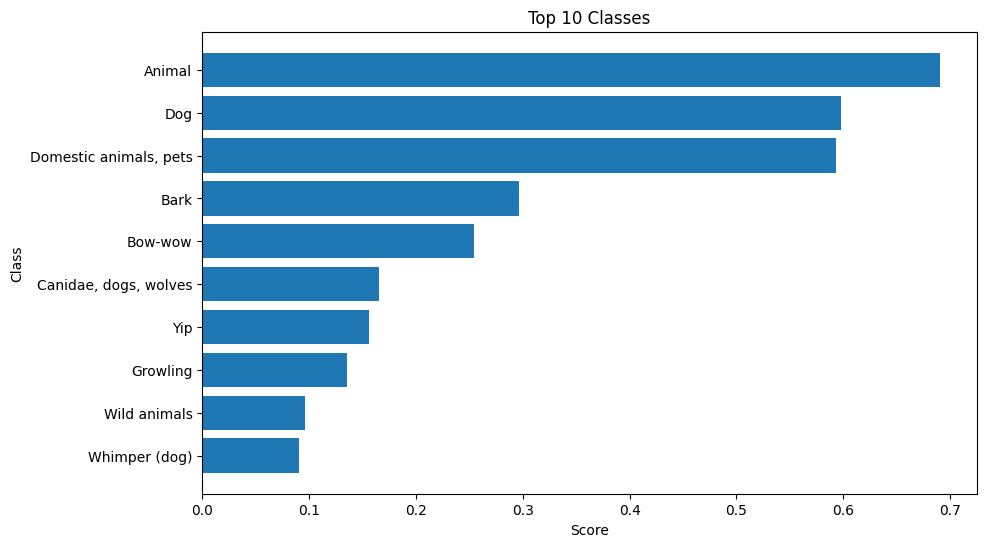

In [72]:
# Plotar as top 10 classes mais prováveis
plot_top_classes(scores.numpy(), class_names)

## Vídeo 4.3 - Obtendo um novo dataset

In [73]:
_ = tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

In [74]:
esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'

In [75]:
df = pd.read_csv(esc50_csv)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [76]:
df['category'].unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

In [77]:
classes = ['dog', 'door_wood_creaks', 'glass_breaking']
mapeamento = {'dog':0, 'door_wood_creaks':1,'glass_breaking':2}

In [79]:
df_filtrado = df[df['category'].isin(classes)]

In [80]:
df_filtrado

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
95,1-20133-A-39.wav,1,39,glass_breaking,False,20133,A
157,1-30226-A-0.wav,1,0,dog,True,30226,A
158,1-30344-A-0.wav,1,0,dog,True,30344,A
...,...,...,...,...,...,...,...
1971,5-257642-A-39.wav,5,39,glass_breaking,False,257642,A
1979,5-260432-A-39.wav,5,39,glass_breaking,False,260432,A
1980,5-260433-A-39.wav,5,39,glass_breaking,False,260433,A
1981,5-260434-A-39.wav,5,39,glass_breaking,False,260434,A


In [81]:
# Aplicar o mapeamento usando loc
df_filtrado.loc[:, 'alvo'] = df_filtrado['category'].apply(lambda name: mapeamento[name])

/tmp/ipykernel_73603/1854891678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'alvo'] = df_filtrado['category'].apply(lambda name: mapeamento[name])


In [82]:
full_path = df_filtrado['filename'].apply(lambda row: os.path.join(base_data_path, row))
df_filtrado = df_filtrado.assign(filename=full_path)
df_filtrado

,filename,fold,target,category,esc10,src_file,take,alvo
0,./datasets/ESC-50-master/audio/1-100032-A-0.wav,1,0,dog,True,100032,A,0
14,./datasets/ESC-50-master/audio/1-110389-A-0.wav,1,0,dog,True,110389,A,0
95,./datasets/ESC-50-master/audio/1-20133-A-39.wav,1,39,glass_breaking,False,20133,A,2
157,./datasets/ESC-50-master/audio/1-30226-A-0.wav,1,0,dog,True,30226,A,0
158,./datasets/ESC-50-master/audio/1-30344-A-0.wav,1,0,dog,True,30344,A,0
...,...,...,...,...,...,...,...,...
1971,./datasets/ESC-50-master/audio/5-257642-A-39.wav,5,39,glass_breaking,False,257642,A,2
1979,./datasets/ESC-50-master/audio/5-260432-A-39.wav,5,39,glass_breaking,False,260432,A,2
1980,./datasets/ESC-50-master/audio/5-260433-A-39.wav,5,39,glass_breaking,False,260433,A,2
1981,./datasets/ESC-50-master/audio/5-260434-A-39.wav,5,39,glass_breaking,False,260434,A,2
